In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
nancyalaswad90_breast_cancer_dataset_path = kagglehub.dataset_download('nancyalaswad90/breast-cancer-dataset')

print('Data source import complete.')


100%|██████████| 48.6k/48.6k [00:00<00:00, 28.5MB/s]

Extracting files...
Data source import complete.


# Import Library

In [2]:
# !pip install -U scikit-learn imbalanced-learn

In [3]:
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

# Dataset loaded

In [9]:
df = pd.read_csv(os.path.join(nancyalaswad90_breast_cancer_dataset_path, 'data.csv'))
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# Dataset information

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [12]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Checking Unique value per feature

In [13]:
columns = df.columns
columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
columns[1]
df[columns[1]].value_counts()

,count
diagnosis,
B,357
M,212


# Exploratory Data Analysis
## Distribution by diagnosis
Interpretation:

* Malignant (M) → The tumor is cancerous — needs urgent medical intervention.

* Benign (B) → The tumor is not cancerous — often harmless, may not require surgery.

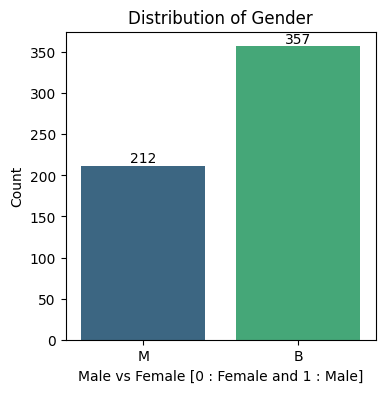

In [15]:
plt.figure(figsize=(4, 4))
datalabel = sns.countplot(x='diagnosis', data=df, palette='viridis')

for i in datalabel.containers:
    datalabel.bar_label(i)


plt.title('Distribution of Gender')
plt.xlabel('Male vs Female [0 : Female and 1 : Male]')
plt.ylabel('Count')
plt.savefig('Distribution of Gender.png')
plt.show()

## Correlation matrix for dataset only numeric columns

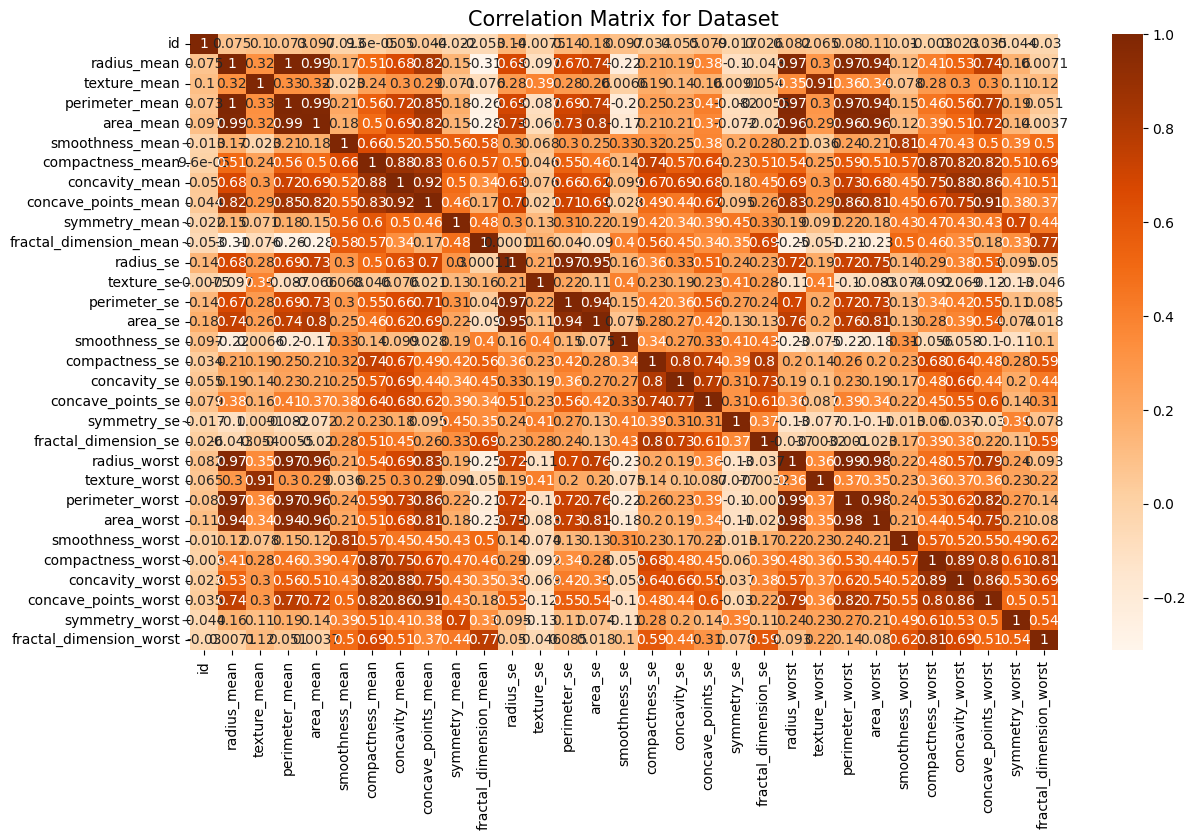

In [16]:
# Correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Oranges")
plt.title("Correlation Matrix for Dataset", fontsize=15)
plt.savefig('Correlation Matrix df.png')
plt.show()

# Data Preprocessing

In [18]:
from sklearn.metrics import  confusion_matrix, classification_report, make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import joblib

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler , LabelEncoder
from sklearn.pipeline import Pipeline


## Label encoder for Categorical columns

In [19]:
df1 = df.copy()

enco =LabelEncoder()

df1['diagnosis'] = enco.fit_transform(df1['diagnosis'])

df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
# df = df.dropna(subset=['diagnosis'])

In [21]:
X = df1.drop(columns=['id','diagnosis'],axis=1)
y = df1['diagnosis']

X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Comparison1. Standard Scaler with full dataset

## Train-Test Split

In [22]:
y

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)

X_train.shape

(483, 30)

In [24]:
standard_scaler = StandardScaler()

X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

X_train

array([[-0.08170206, -0.73088723, -0.1496249 , ..., -0.90243232,
        -0.87853462, -0.72084802],
       [ 3.26780894, -0.44148603,  3.35265354, ...,  2.43146725,
         1.26175734,  0.22987185],
       [-0.25115456, -0.54335525, -0.31190368, ..., -0.27789432,
        -0.64645477, -0.43596721],
       ...,
       [ 0.01149681,  0.26928332,  0.00938377, ...,  0.2845232 ,
        -0.60132813, -0.3046986 ],
       [ 0.85875929,  1.19305196,  0.9000776 , ...,  1.13299792,
         0.6541594 ,  2.78542029],
       [ 1.85570481,  2.7210903 ,  1.77891731, ...,  0.7693659 ,
        -0.06303181, -0.10360627]])

## Hyperparameter Grids

In [25]:
param_grids = {
    "knn": {
        'n_neighbors': [8,12]
    },
    "rf": {
        "max_depth": [20,30],
        "min_samples_split": [10,20,30],
        "min_samples_leaf": [1, 3]
    },
    "dt": {
        "max_depth": [15,25],
        "min_samples_split": [2, 10,15],
        "min_samples_leaf": [1, 3]
    },
    "lgb": {
        "num_leaves": [15, 65],
        "max_depth": [10, 15],
    }
}


## Model Definitions

In [26]:
models = {
    "knn" :KNeighborsClassifier(),

    "rf": RandomForestClassifier(
                random_state=42,
                n_jobs=-1,
                n_estimators=1000,
                verbose=0
        ),

    "dt": DecisionTreeClassifier(
                random_state=42,
                #class_weight="balanced"
        ),

    "lgb": LGBMClassifier(
            random_state=42,
            n_jobs=-1,
            #device="gpu",
            verbosity=-1,
            boost_from_average=False,
            force_row_wise=True,
            #scale_pos_weight=4,        # imbalance dataset positive class weight (ratio of neg/pos)
            #subsample=0.8,             # row sampling → overfitting reduce
            #colsample_bytree=0.8,      # feature sampling
            boosting_type="gbdt",      # default GBDT
            learning_rate=0.1,
            n_estimators=1000
        )
}

## Hyperparameter Tuning

In [27]:
best_params = {}

scorer = make_scorer(accuracy_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f" --------Tuning  {name}  Model --------\n")
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=50,                # reduce for speed
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=0,
        random_state=20
    )
    search.fit(X_train, y_train)
    best_params[name] = search.best_params_
    print(f"Best {name} params: {search.best_params_}\n")

    joblib.dump(search.best_estimator_, f"best_{name}.pkl")


 --------Tuning  knn  Model --------

Best knn params: {'n_neighbors': 12}

 --------Tuning  rf  Model --------

Best rf params: {'min_samples_split': 20, 'min_samples_leaf': 1, 'max_depth': 20}

 --------Tuning  dt  Model --------

Best dt params: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 15}

 --------Tuning  lgb  Model --------

Best lgb params: {'num_leaves': 15, 'max_depth': 10}



## Reload Tuned Models

In [28]:
knn_final = joblib.load("best_knn.pkl")

rf_final = joblib.load("best_rf.pkl")

dt_final = joblib.load("best_dt.pkl")

lgb_final = joblib.load("best_lgb.pkl")


final_models = [knn_final, rf_final, dt_final, lgb_final]

models_name =["KNeighborsClassifier","RandomForestClassifier","DecisionTreeClassifier","LGBMClassifier"]

In [30]:
def ComparisionResult(final_models , models_name, X_test,y_test):
    data =[]
    for i,model in enumerate(final_models):
        y_pred = model.predict(X_test)

        print(f'\n{models_name[i]} Best score : {accuracy_score(y_test, y_pred)}\n')

        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="seismic")
        plt.title(f'Confusion Matrix for {models_name[i]}', fontsize=14)
        plt.savefig(f'Confusion Matrix {models_name[i]}.png')
        plt.show()

        result = {
                "Model": models_name[i],
                "Accuracy": accuracy_score(y_test, y_pred),
                "Precision": precision_score(y_test, y_pred),
                "Recall": recall_score(y_test, y_pred),
                "F1": f1_score(y_test, y_pred),
                "ROC_AUC": roc_auc_score(y_test, y_pred)
            }

        data.append(result)
    return data


KNeighborsClassifier Best score : 0.9651162790697675



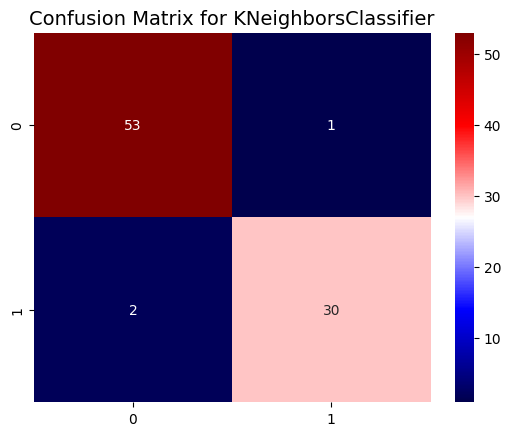


RandomForestClassifier Best score : 0.9767441860465116



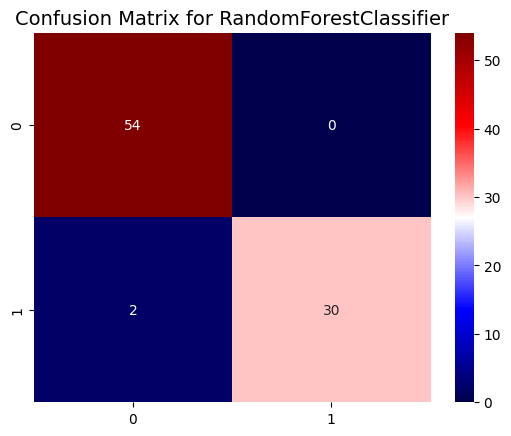


DecisionTreeClassifier Best score : 0.9418604651162791



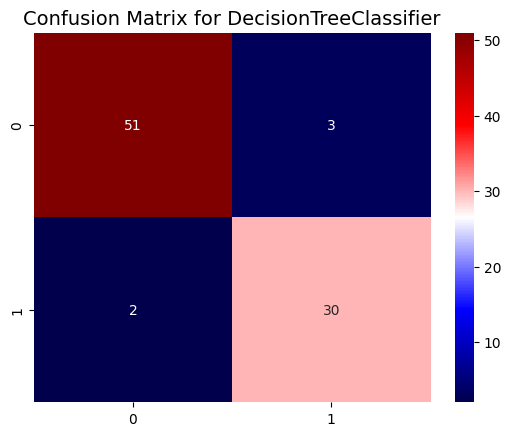


LGBMClassifier Best score : 1.0



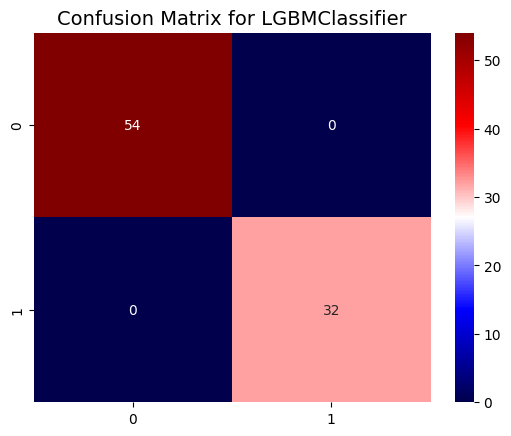

In [31]:
Result_table = ComparisionResult(final_models , models_name, X_test,y_test)


In [32]:
Result_table_1 = pd.DataFrame(Result_table)

Result_table_1

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,KNeighborsClassifier,0.965116,0.967742,0.9375,0.952381,0.959491
1,RandomForestClassifier,0.976744,1.000000,0.9375,0.967742,0.968750
2,DecisionTreeClassifier,0.941860,0.909091,0.9375,0.923077,0.940972
3,LGBMClassifier,1.000000,1.000000,1.0000,1.000000,1.000000


## VotingClassifier Ensemble

In [33]:
ensemble_clf = VotingClassifier(
    estimators=[("knn", knn_final),
                ("rf", rf_final),
                ("dt", dt_final),
                ("lgb", lgb_final)
               ],
    voting="soft",  # probability-based voting
    n_jobs=-1
)


ensemble_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=12)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=20,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             force_row_wise=True, max_depth=10,
                                             n_estimators=1000, n_jobs=-1,
                                             num_leaves=15, random_state=42,
                                             verbosity=-1))],
                 n_jobs=-1, voting='soft')

## Evaluation for VotingClassifier

In [34]:
y_pred = ensemble_clf.predict(X_test)

print("\nFinal Ensemble Results:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_pred))


Final Ensemble Results:
Accuracy : 0.9883720930232558
Precision: 1.0
Recall   : 0.96875
F1 Score : 0.9841269841269841
ROC AUC  : 0.984375


# Comparison2. With Outlier Removal
Outliers are extreme values in the dataset that deviate significantly from other observations.  
They can occur due to data entry errors, measurement variability, or genuine rare events.  

Removing outliers is important because:
- They can **skew the distribution** of features.
- They may **bias the model** and reduce accuracy.
- They often **affect metrics** like mean and standard deviation.

**Interquartile Range (IQR) Method**  
   - Compute the 25th percentile (Q1) and 75th percentile (Q3).  
   - IQR = Q3 - Q1  
   - Any data point below **Q1 - 1.5 × IQR** or above **Q3 + 1.5 × IQR** is considered an outlier.
## Draw the Standard Outlier

IQR :  362.40000000000003
lower bound :  -123.30000000000001
upper bound :  1326.3000000000002
# of Outlier :  25


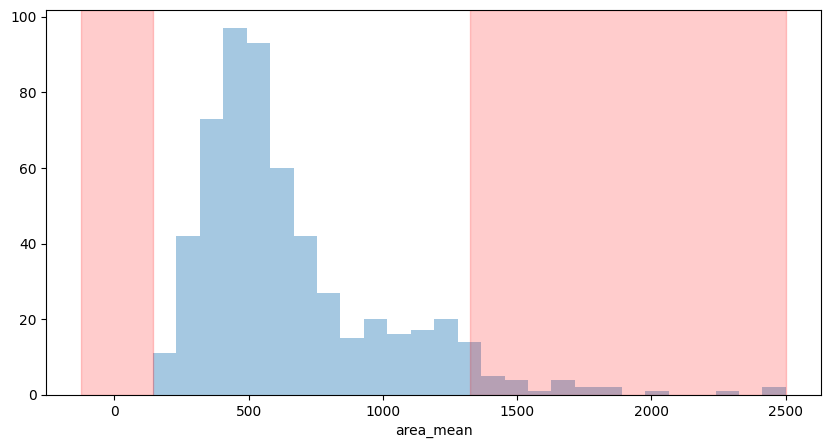

IQR :  28.929999999999993
lower bound :  31.775000000000013
upper bound :  147.49499999999998
# of Outlier :  13


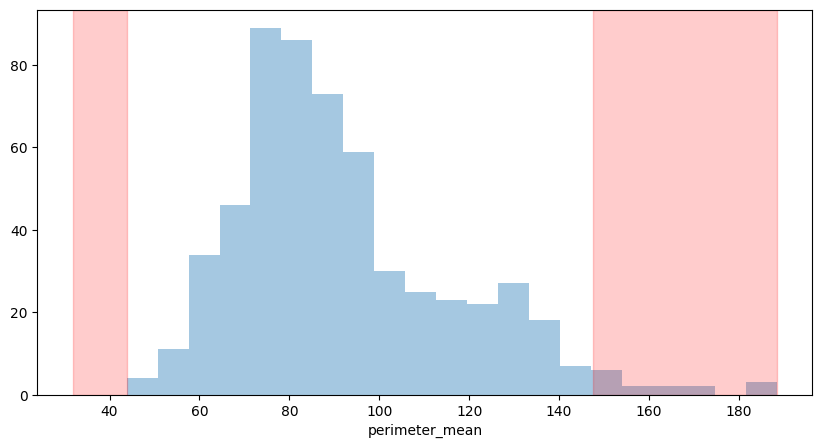

In [35]:
def draw_outlier_hist(data, column):

    global lower, upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    print('IQR : ',iqr)
    print('lower bound : ', lower)
    print('upper bound : ', upper)

    data1 = data[data[column] > upper]
    data2 = data[data[column] < lower]

    print('# of Outlier : ', data1.shape[0] + data2.shape[0])

    plt.figure(figsize=(10,5))
    sns.distplot(data[column], kde=False)
    plt.axvspan(xmin=lower, xmax=data[column].min(), alpha=0.2, color='red')
    plt.axvspan(xmin=upper, xmax=data[column].max(), alpha=0.2, color='red')
    plt.show()

    return


draw_outlier_hist(df1,'area_mean')
draw_outlier_hist(df1,'perimeter_mean')

## Remove Outlier from Full Dataset

In [36]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

outlier = df1[((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

df2 = df1[~((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [37]:
print(f'Outlier found : {outlier.shape}')

Outlier found : (223, 32)


In [38]:
print(f'Dataset after Outlier removed : {df2.shape}')

Dataset after Outlier removed : (346, 32)


In [39]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
10,845636,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
13,846381,1,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,...,16.84,27.66,112.0,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
16,848406,1,14.68,20.13,94.74,684.5,0.09867,0.07200,0.07395,0.05259,...,19.07,30.88,123.4,1138.0,0.1464,0.1871,0.2914,0.16090,0.3029,0.08216
19,8510426,0,13.54,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,...,15.11,19.26,99.7,711.2,0.1440,0.1773,0.2390,0.12880,0.2977,0.07259


## Split df1 after outlier removal

In [40]:
X = df2.drop(columns=['id','diagnosis'],axis=1)
y = df2['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

scaler_std = StandardScaler()

X_train_scaled = scaler_std.fit_transform(X_train)

X_test_scaled = scaler_std.transform(X_test)


## Hyper Parameter Tuning after removed Outlier

In [41]:
best_params = {}

scorer = make_scorer(accuracy_score)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f" --------Tuning  {name}  Model --------\n")
    search = RandomizedSearchCV(
        model,
        param_grids[name],
        n_iter=50,                # reduce for speed
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=0,
        random_state=20
    )
    search.fit(X_train_scaled, y_train)
    best_params[name] = search.best_params_
    print(f"Best {name} params: {search.best_params_}\n")

    joblib.dump(search.best_estimator_, f"best_{name}.pkl")


 --------Tuning  knn  Model --------

Best knn params: {'n_neighbors': 12}

 --------Tuning  rf  Model --------

Best rf params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}

 --------Tuning  dt  Model --------

Best dt params: {'min_samples_split': 15, 'min_samples_leaf': 1, 'max_depth': 15}

 --------Tuning  lgb  Model --------

Best lgb params: {'num_leaves': 15, 'max_depth': 10}



In [42]:
knn_final = joblib.load("best_knn.pkl")

rf_final = joblib.load("best_rf.pkl")

dt_final = joblib.load("best_dt.pkl")

lgb_final = joblib.load("best_lgb.pkl")


final_models = [knn_final, rf_final, dt_final, lgb_final]

models_name =["KNeighborsClassifier","RandomForestClassifier","DecisionTreeClassifier","LGBMClassifier"]

## Comparison tables and Heatmap


KNeighborsClassifier Best score : 0.9230769230769231



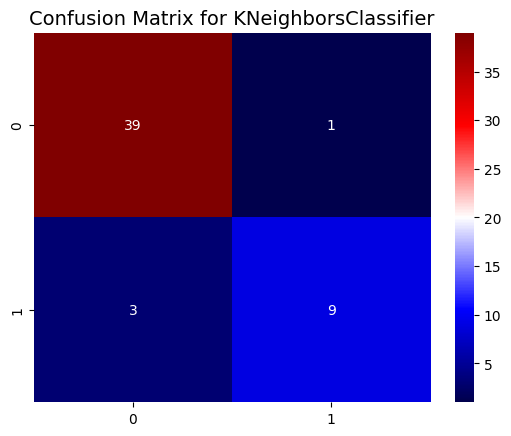


RandomForestClassifier Best score : 0.9230769230769231



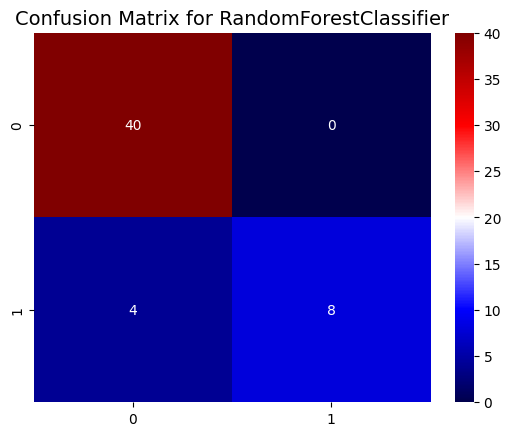


DecisionTreeClassifier Best score : 0.8846153846153846



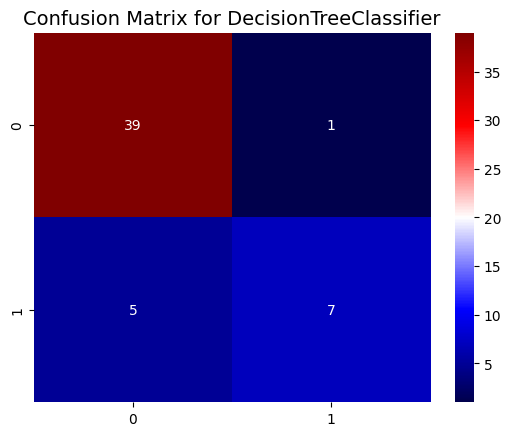


LGBMClassifier Best score : 0.9423076923076923



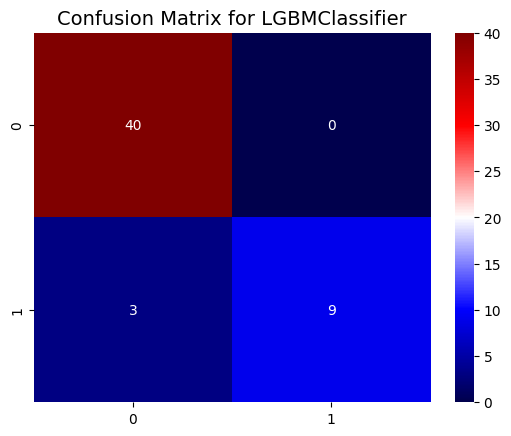

In [43]:
# call the ComparisonResult function
Result_table = ComparisionResult(final_models , models_name, X_test_scaled, y_test)

In [44]:
Result_table_2 = pd.DataFrame(Result_table)

Result_table_2

,Model,Accuracy,Precision,Recall,F1,ROC_AUC
0,KNeighborsClassifier,0.923077,0.900,0.750000,0.818182,0.862500
1,RandomForestClassifier,0.923077,1.000,0.666667,0.800000,0.833333
2,DecisionTreeClassifier,0.884615,0.875,0.583333,0.700000,0.779167
3,LGBMClassifier,0.942308,1.000,0.750000,0.857143,0.875000


## VotingClassifier ensemble after Outlier removal

In [45]:
ensemble_clf = VotingClassifier(
    estimators=[("knn", knn_final),
                ("rf", rf_final),
                ("dt", dt_final),
                ("lgb", lgb_final)
               ],
    voting="soft",  # probability-based voting
    n_jobs=-1
)


ensemble_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=12)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=15,
                                                     min_samples_split=15,
                                                     random_state=42)),
                             ('lgb',
                              LGBMClassifier(boost_from_average=False,
                                             force_row_wise=True, max_depth=10,
                                             n_estimators=1000, n_jobs=-1,
                                             num_leaves=15, random_state=42,
                                             verbosity=-1))],
                 n_jobs=-1, voting='soft')

In [46]:
y_pred = ensemble_clf.predict(X_test_scaled)

print("\nFinal Ensemble Results:")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_pred))


Final Ensemble Results:
Accuracy : 0.9230769230769231
Precision: 1.0
Recall   : 0.6666666666666666
F1 Score : 0.8
ROC AUC  : 0.8333333333333333


In [3]:
# ADD THIS CELL AT THE END OF YOUR NOTEBOOK
# Save the model and scaler
joblib.dump(ensemble_clf, 'breast_cancer_ensemble_model.pkl')
joblib.dump(scaler_std, 'scaler.pkl')

print("Model and scaler saved successfully!")

NameError: name 'joblib' is not defined